## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
from tensorflow import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 127. - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650   

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
# to measure execution time
!pip install ipython-autotime
%load_ext autotime

time: 0 ns


In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 21ms/step - loss: 1.7078 - accuracy: 0.3943 - val_loss: 1.5322 - val_accuracy: 0.4568
Epoch 2/100
196/196 [==============================] - 3s 16ms/step - loss: 1.4792 - accuracy: 0.4787 - val_loss: 1.4676 - val_accuracy: 0.4791
Epoch 3/100
196/196 [==============================] - 3s 17ms/step - loss: 1.3526 - accuracy: 0.5240 - val_loss: 1.4114 - val_accuracy: 0.5048
Epoch 4/100
196/196 [==============================] - 3s 17ms/step - loss: 1.2518 - accuracy: 0.5604 - val_loss: 1.3750 - val_accuracy: 0.5211
Epoch 5/100
196/196 [==============================] - 3s 17ms/step - loss: 1.1552 - accuracy: 0.5919 - val_loss: 1.3725 - val_accuracy: 0.5198
Epoch 6/100
196/196 [==============================] - 3s 18ms/step - loss: 1.0732 - accuracy: 0.6212 - val_loss: 1.3737 - val_accuracy: 0.5278
Epoch 7/100
196/196 [==============================] - 3s 18ms/step - loss: 1.0007 - accuracy: 0.6485 - val_loss: 1.3662 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.0917 - accuracy: 0.9708 - val_loss: 3.8147 - val_accuracy: 0.5397
Epoch 58/100
196/196 [==============================] - 4s 18ms/step - loss: 0.0951 - accuracy: 0.9695 - val_loss: 3.6672 - val_accuracy: 0.5456
Epoch 59/100
196/196 [==============================] - 4s 18ms/step - loss: 0.0660 - accuracy: 0.9782 - val_loss: 3.8454 - val_accuracy: 0.5428
Epoch 60/100
196/196 [==============================] - 4s 19ms/step - loss: 0.0905 - accuracy: 0.9715 - val_loss: 3.9873 - val_accuracy: 0.5446
Epoch 61/100
196/196 [==============================] - 4s 18ms/step - loss: 0.0824 - accuracy: 0.9734 - val_loss: 3.7056 - val_accuracy: 0.5420
Epoch 62/100
196/196 [==============================] - 3s 18ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 3.8630 - val_accuracy: 0.5441
Epoch 63/100
196/196 [==============================] - 3s 17ms/step - loss: 0.0839 - accuracy: 0.9745 - val_loss: 3.8353 - val_accuracy: 0.538

time: 6min 6s


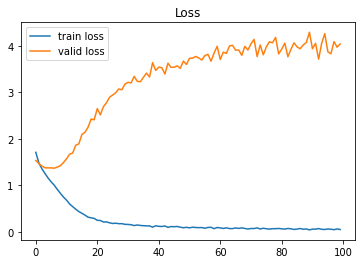

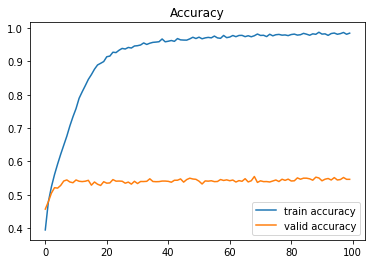

time: 3.77 s


In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()